In [1]:
import casestudy1 as cs1

%matplotlib inline

There were a few main things to do about the data processing. <br><br>
First, I had to deal with the non-numeric data. I decided to use one hot encoding
to split them into a lot of binary data, except for the job titles, I just threw those out. There were 4000 something unique job titles, and there was no way to make meaningful data out of that without creating categories, which would be too intensive for the small gain I could maybe get out of it. I ended up pruning most of the binary one hot data, because there was too small of a correlation to the interest rate, and there was no improvement in the models I tested from including them.
<br><br>
The non-numeric data that I spent the most time trying to figure out what to do with was the grade and subgrades. I ended up finding a chart online that described how each subgrade relates to an interest rate adjustment. This feature ended up being so correlated with the interest rate that it overpowered most of the other data. With just that one feature the linear regression was able to achieve a .95 R2 score. I was able to use the rest of the data to improve on that to .995 or thereabouts.
<br><br>
To replace the blank or NA valuees in some of the features, I had to think about why some of the values were blank in the first place. Some of them, I zeroed out, some, I replaced with a large value, some with an average. If there were few entries missing I usually replaced with the average. 
<br><br>
I ended up pruning quite a bit of the processed data that I had. I sorted the features by how well they correlated with the interest rate and removed about half that had the least correlation. 

<Figure size 432x288 with 0 Axes>

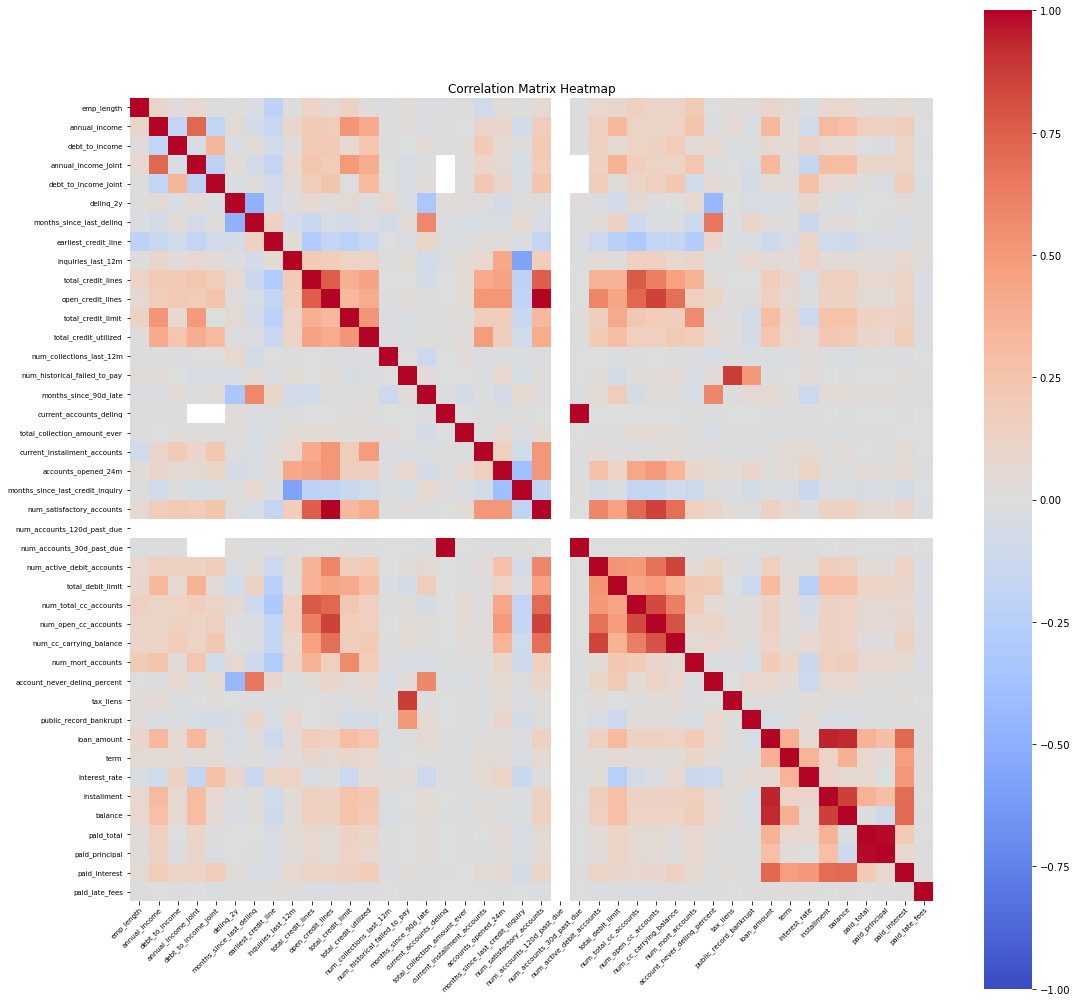

In [2]:
cs1.make_corr_heatmap(cs1.df)

One main thing that you can gather from this picture, is that there are many variables that are not well ocrrelated with each other or with the interest rate. Ideally, I woudl have more time to prune away all of the parts of this graph that are light gray and highlight the more important features. Anyway this picture looks a bit pretty, and it's symmetric and kind of visually appealing.

When I was doing a bit of research for this assignment, I found this data on interest rate adjustments at the lendingclub website. I used it in my models, which is why they have such high accuracy.


sub_grade_risk_rate_adj_table = {'A1': 3.41,'A2': 3.97,'A3': 4.51,'A4': 5.14,'A5': 5.14,
                                 'B1': 8.28,'B2': 8.97,'B3': 9.66,'B4':10.35,'B5':11.03,
                                 'C1':12.25,'C2':13.19,'C3':14.07,'C4':14.90,'C5':15.69,
                                 'D1':17.57,'D2':19.50,'D3':22.00,'D4':24.60,'D5':25.94,
                                 'E1':23.85,'E2':23.87,'E3':23.90,'E4':23.92,'E5':23.95,
                                 'F1':24.30,'F2':24.64,'F3':25.12,'F4':25.60,'F5':25.70,
                                 'G1':25.74,'G2':25.79,'G3':25.84,'G4':25.89,'G5':25.94}

<Figure size 432x288 with 0 Axes>

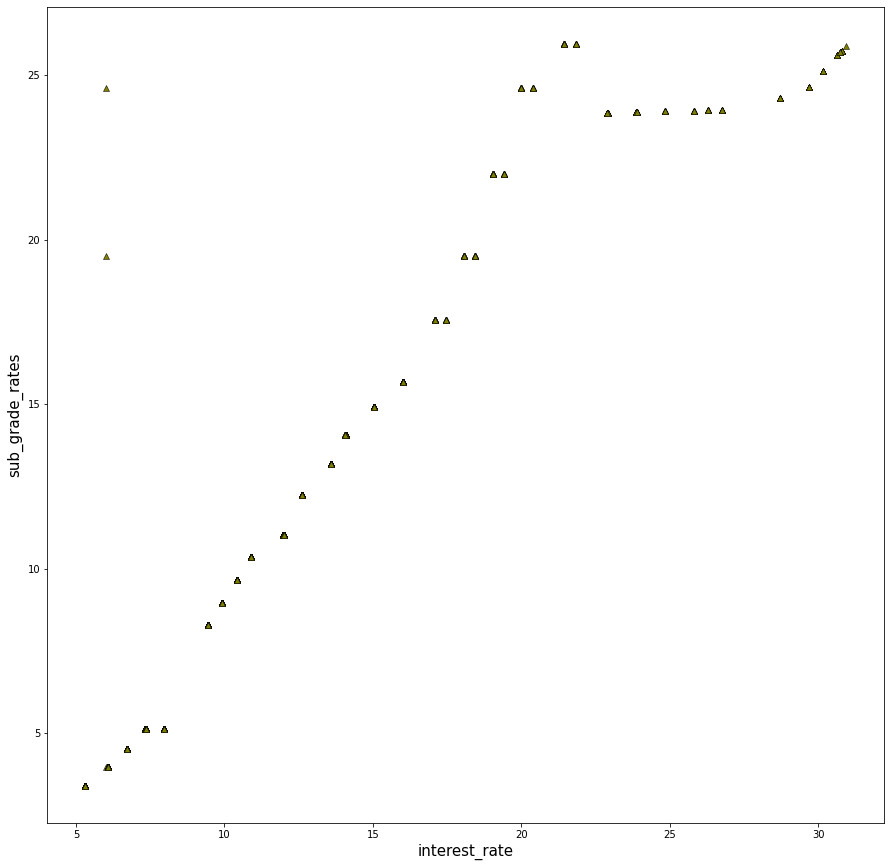

In [3]:
cs1.make_scatterplot(cs1.processed_data, 'interest_rate', 'sub_grade_rates')

A scatter plot showing the strong correlation between the subgrade and final interest rate. Compared to all the other scatter plots, some examples shown below, there is nowhere near this level of correlation anywhere else. The two highest non-subgrade related independent variables are shown below, counting "term", judging by the shape of it's graph seems odd, so I also included "total debit limit".

<Figure size 432x288 with 0 Axes>

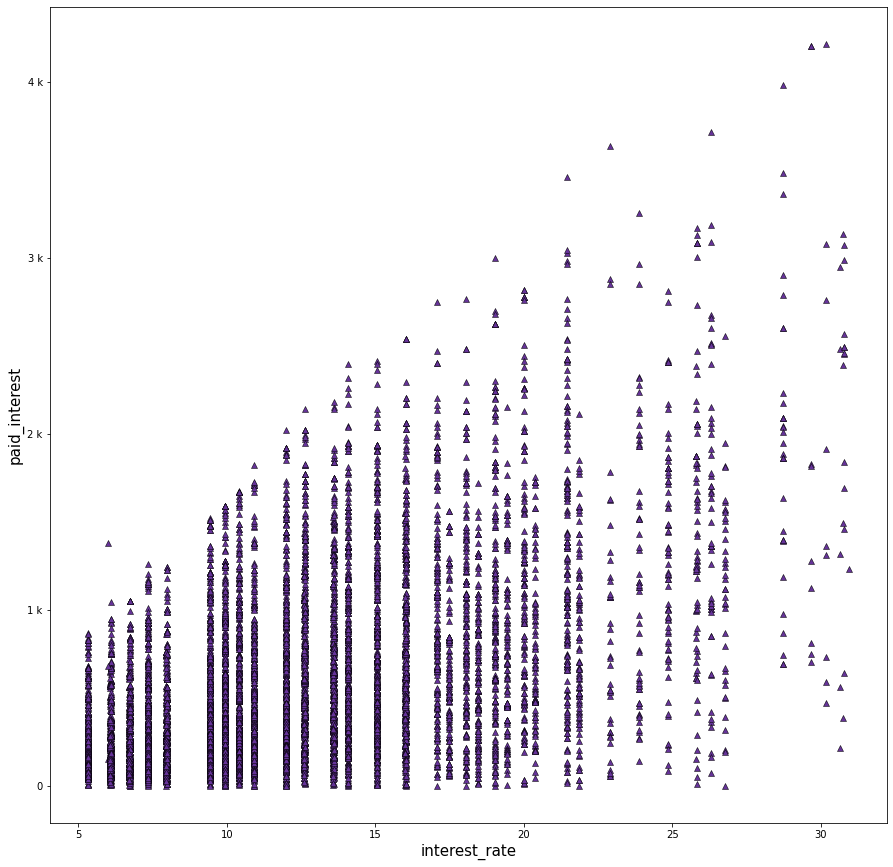

In [4]:
cs1.make_scatterplot(cs1.df, 'interest_rate', 'paid_interest')

Paid interest seems to be a feature that is only known after a loan has been active for a while, so it would not be very useful for forecasting. Perhaps this is from previous loan data though, I would need more information about the specifics of the features to know.

<Figure size 432x288 with 0 Axes>

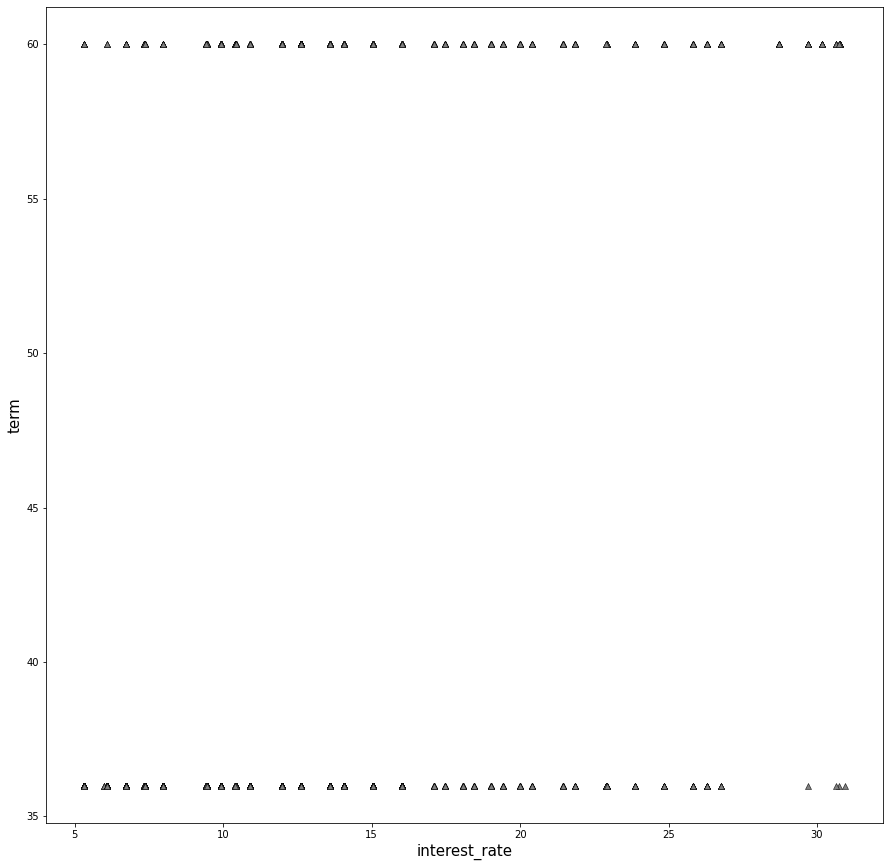

In [5]:
cs1.make_scatterplot(cs1.df, 'interest_rate', 'term')

<Figure size 432x288 with 0 Axes>

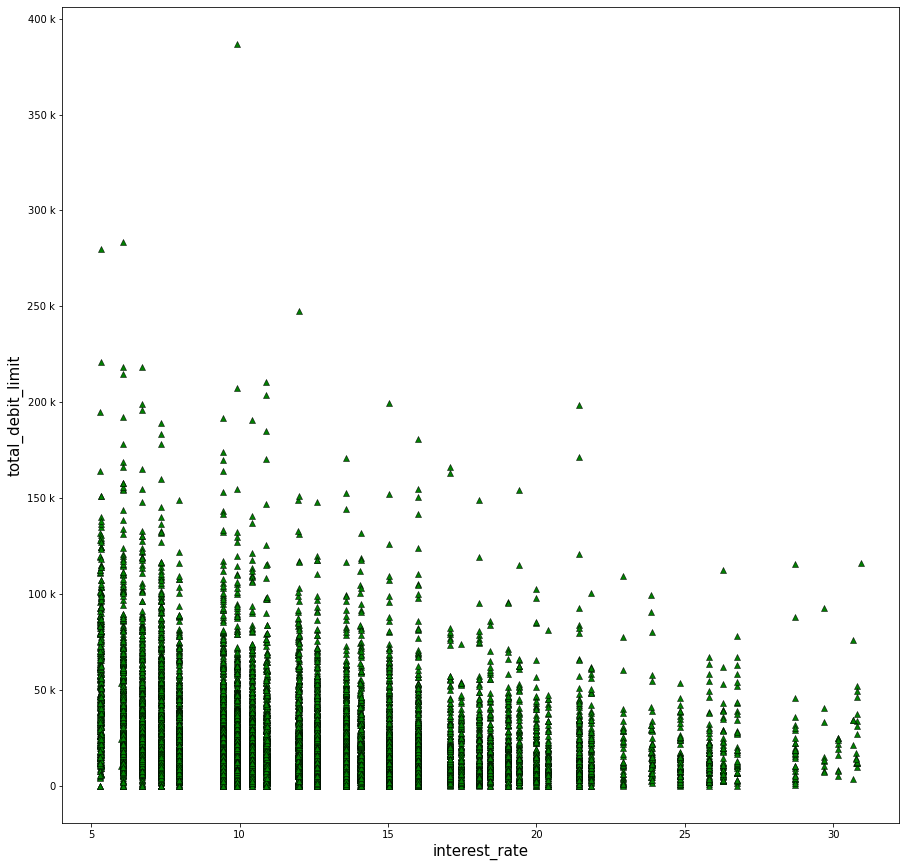

In [6]:
cs1.make_scatterplot(cs1.df, 'interest_rate', 'total_debit_limit')

My two regression models are below. I used a linear regression and a multi level perceptron regressor. I generally like using an mlp because of it's generalziability and ability to capture nonlinear features in data. In this dataset, it did not perform any better, and it takes considerably more time and compute power to train. Definitely including the subgrade data, the interest is strongly linearly correlated with the data.

<br>
One thing that I would like to do to improve my models, is to better prune the dataset. I would also like to learn more about the data collection process that went into some of the features. In the features that had NA or blank values, it would be useful to know whether these data points were missing because of random chance or whether they were just from people who, for example did not have any past due payments ever or something like that.

LINREGR R2_Score : 0.9997334460090823


<Figure size 432x288 with 0 Axes>

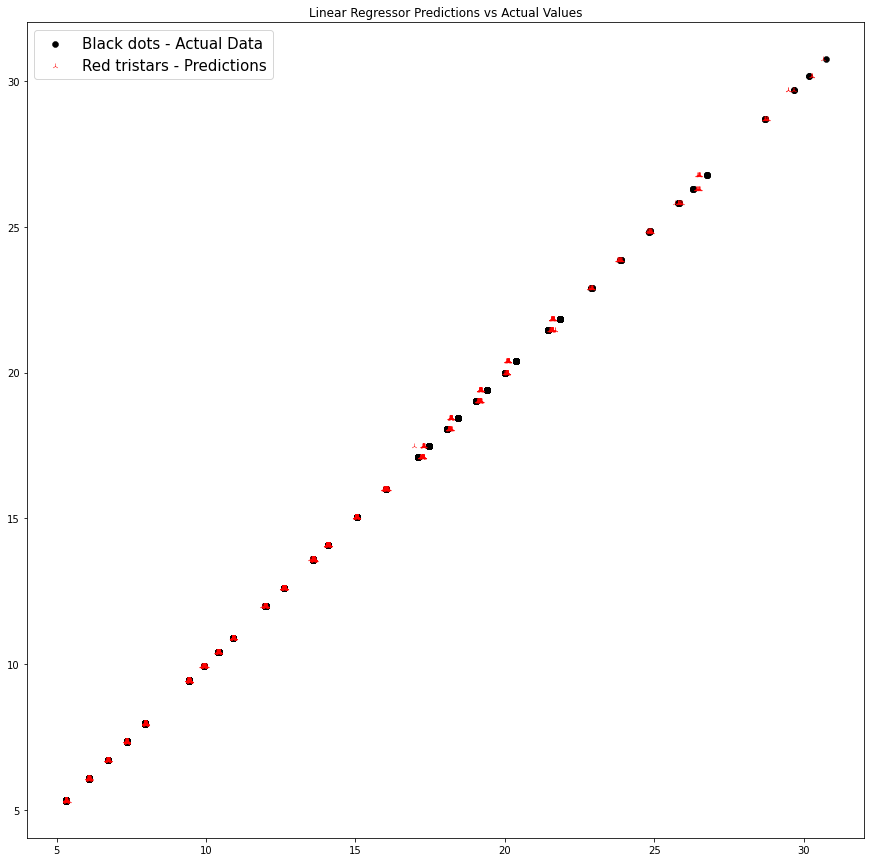

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [7]:
cs1.linregress()

MLP(3, 5, 4) R2_Score : 0.9952953853507593


<Figure size 432x288 with 0 Axes>

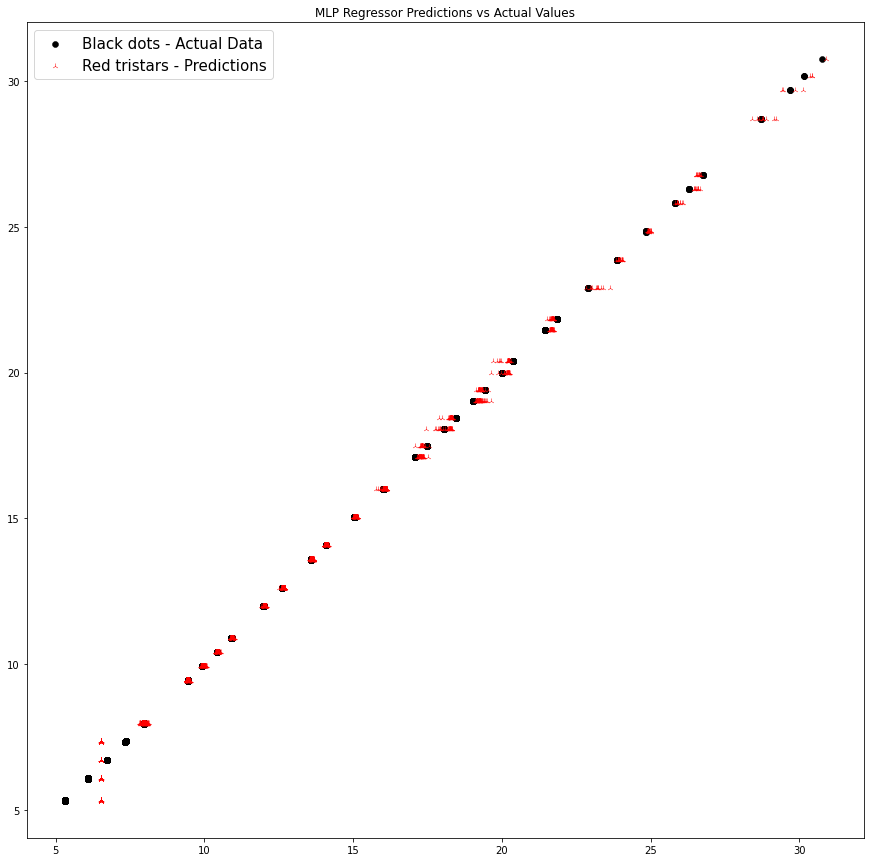

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(alpha=0.00015, hidden_layer_sizes=(3, 5, 4),
                              learning_rate='adaptive',
                              learning_rate_init=0.0005, max_iter=100000,
                              random_state=838342, tol=1e-07))])

In [8]:
cs1.mlpregress((3,5,4))